
<img src="https://raw.githubusercontent.com/archivesunleashed/archivesunleashed.org/master/themes/hugo-material-docs/static/images/logo-square.png" height="100px" width="100px">


# Welcome

Welcome to the Archives Unleashed Cloud Visualization Demo in Jupyter Notebook for your collection. This demonstration takes the main derivatives from the Cloud and uses Python to analyze and produce information about your collection.

This product is in beta, so if you encounter any issues, please post an [issue in our Github repository](https://github.com/archivesunleashed/auk/issues) to let us know about any bugs you encountered or features you would like to see included.

If you have some basic Python coding experience, you can change the code we provided to suit your own needs.

Unfortunately, we cannot support code that you produced yourself. We recommend that you use `File > Make a Copy` first before changing the code in the repository. That way, you can always return to the basic visualizations we have offered here. Of course, you can also just re-download the Jupyter Notebook file from your Archives Unleashed Cloud account.

### How Jupyter Notebooks Work:

If you have no previous experience of Jupyter Notebooks, the most important thing to understand is that that <Shift><Enter/Return> will run the python code inside a window and output it to the site.
    
The window titled `# RUN THIS FIRST` should be the first place you go. This will import all the libraries and set basic variables (e.g. where your derivative files are located) for the notebook. After that, everything else should be able to run on its own.


In [3]:
# RUN THIS FIRST

# This Window will set up all the necessary libraries and dependencies
# for your Collection.
coll_id = "4656"
auk_fp = "data/"
auk_full_text = auk_fp + coll_id + "-fulltext.txt"
auk_gephi = auk_fp + coll_id + "-gephi.gexf"
auk_graphml = auk_fp + coll_id + "-gephi.grapml"
auk_domains = auk_fp + coll_id + "-fullurls.txt"
auk_filtered_text = auk_fp + coll_id + "-filtered_text.zip"

# The following script will attempt to install the necessary dependencies
# for the visualisations. You may prefer to install these on your
# own in the command line.
import sys
from collections import Counter

try:  # a library for manipulating column data.
    import pandas as pd
except ImportError:
    !{sys.executable} -m pip install pandas  

try:
    import matplotlib.pyplot as plt # a library for Plotting
except ImportError:
    !{sys.executable} -m pip install matplotlib

try:
    import numpy as np # a library for complex mathematics
except ImportError:
    !{sys.executable} -m pip install numpy
    
try:
    from nltk.tokenize import word_tokenize
    from nltk.draw.dispersion import dispersion_plot as dp
except ImportError:
    !{sys.executable} -m pip install nltk
    
import nltk
nltk.download('punkt')

/usr/local/lib/python3.7/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


# Text Analysis

The following set of functions use the [Natural Language Toolkit](https://www.nltk.org) Python library to search for the top most used words in the collection, as well as facilitate breaking it down by name or domain.

In [1]:
# You can change the value of `top` to get more results. 
top = 30

def clean_domain(s):
    stop_words = ["com", "org", "net", "edu"]
    ret = ""
    dom = s.split(".")
    if len(dom) <3:
        ret = dom[0]
    elif dom[-2] in stop_words:
        ret = dom[-3]
    else:
        ret = dom[1]
    return ret

def get_text(by="all"):
    tokens = []
    with open(auk_full_text) as fin:
        for line in fin:
            split_line = str(line).split(",")
            if by == "domain":    
                tokens.append((clean_domain(split_line[1]), split_line[3]))
            elif by == "year":
                tokens.append((split_line[0][1:5], split_line[3]))
            else:
                tokens.append(split_line[3])
    return tokens

def get_text_tokens (minlen=3) :
    tokens = []
    with open (auk_full_text) as fin:
        for line in fin:
            tokens += word_tokenize(str(line).split(",")[3])
    tokens = [x for x in tokens if len(x) > minlen]
    return tokens

def get_tokens_domains(minlen=3):
    tokens = []
    with open (auk_full_text) as fin:
        for line in fin:
            split_line = str(line).split(',')
            tokens.append((clean_domain(split_line[1]), Counter([x for x in word_tokenize(str(split_line[3])) if len(x) > minlen])))
    return tokens

def get_tokens_years(minlen=3):
    tokens = []
    with open (auk_full_text) as fin:
        for line in fin:
            split_line = str(line).split(',')
            tokens.append((split_line[0][1:5], Counter([x for x in word_tokenize(str(split_line[3])) if len(x) > minlen])))
    return tokens

def year(minlen=3):
    return get_tokens_years(minlen)

def domain(minlen=3):
    return get_tokens_domains(minlen)

def get_top_tokens(total=20, minlen=3):
    return [(key, value) for key, value in Counter(get_text_tokens(minlen)).most_common(total)]

def get_top_tokens_by(fun, total=20, minlen=3):
    sep = dict()
    tokens = fun(minlen)
    sep = {k[0]: Counter() for k in tokens}
    for key, value in tokens:
        sep[key] += value
    ret = [(key, val.most_common(total)) for key, val in sep.items()]
    return (ret)

def international(text):
    return text.decode("utf-8").encode("utf-16")

Now that you have saved the above functions, you can now use them in a variety of ways. 

### Text by Year

In [2]:
# Get the set of available years in the collection 
set([x[0] for x in get_text("year")])

NameError: name 'auk_full_text' is not defined

Now we can create separate lists with text files from individual years in this collection. The example below selects all items from the year 2016. You may need to change it.

In [4]:
year_results = [t[1] for t in get_text("year") if t[0] == "2016"]

In [20]:
# print the first ten results from the year specified above
for x in year_results[:10]:
    print(x)

)

)

)

404 Not Found Not Found The requested URL /thumbs/c3e0677be2f6.jpg was not found on this server.)

404 Not Found Not Found The requested URL /thumbs/6a5e80c11f3d.jpg was not found on this server.)

404 Not Found Not Found The requested URL /thumbs/eb55c88d287c.png was not found on this server.)

�      �}kS#9��g&b���=��e�G�>@Cs�nNC���� BU%�Ք�jJU���#�g�q��_r3%��/ �׬��R��L�2�T����~�?�������19��w|�Or�R���~�����P+�5r�S�[��:�.�>�H�^�T���*^U���+�}*���]+ٮ�Y� ��Ο~x�i�z`;�3���l6Kט''3��^���y�+9�U����
302 Found Found The document has moved here.)

Save.ca - Coupons and Deals For All of Canada - Save.ca - ExternalWidget Flyers WEEKLY FLYERS LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER LOADING  &nbspFLYER)

JobPosting - schema.org schema.org Documentation Schemas Home JobPosting Thing > Intangible > JobPosting A listing that describes a job ope

In [6]:
# you may now want to export this file so you can work with it. 
# this will appear in the directory that this notebook is in
# you may want to change the output path

with open("results-2016.txt", "w") as output_file:
    for value in year_results:
        output_file.write(str(value))

### Text by Domain

In [7]:
# Get the set of available domains in the collection 
set([x[0] for x in get_text("domain")])

{'accuweather',
 'bcdailybuzz',
 'blackpress',
 'facebook',
 'google',
 'googleapis',
 'googlesyndication',
 'issuu',
 'nanaimodailynews',
 'save',
 'schema'}

In [8]:
# extract only the given domain to a file and see how many results there are

domain_results = [t[1] for t in get_text("domain") if t[0] == "nanaimodailynews"]
len(domain_results)

9835

In [9]:
# print the first five results from the year specified above
domain_results[:5]

["Nanaimo Daily News - Nanaimo Daily News Real Estate e-Edition Obits 27° Sunny Home Our Team Contact Us Advertising Info News BC News Sports BC Sports BC Games NFL Business BC Business Entertainment BC Arts & Entertainment What's on Guide Our Town Opinion BC Opinions Letters Web Poll Driveway World Canada / World Sports Vancouver \xa0 Classifieds Browse Classifieds BC Jobs Connect with Us \xa0 Goodbye posted Jan 29",
 "�\x08\x00\x00\x00\x00\x00\x00\x03�}kS#9��g&b���=��\x1fe\x1b�G�>@C\x0fs�nNC���� BU%�Ք�jJU���#�g�\x13q��_r3%��/ �\u05ec�\x19�R��L�2�T����~�?���\x01����19��w|�Or�R���~�����P+�5r�S�[��:�.�\x0e>�H�\x1f\x04^�T���*^U���+�}*���]+ٮ�Y� ��Ο~x�i�z`;�3���l6Kט''3��^���y�\x01+9�U����\x7f",
 'Nanaimo Daily News - Local News',
 '�\x08\x00\x00\x00\x00\x00\x00\x03�Z�n\x1b�\x15��\x00y�1�f���$�(q)�E|k\x058\x17$\x0e��0���Yr��yw(J \x04\x14}����E�$O�o�����d�r�ݝ9�̹|s�e�\x0f������~|A\x16"K�|��T^IJ�����.F:�\x05����L3&(�\x16����u�"�\x1fw[3\x0b!J��[�Y���/��ϊ����)뒨�\x05��v�b��9\x1bD����ll$\x08.R��/�

In [10]:
# you may now want to export this file so you can work with the text of one domain. 
# this will appear in the directory that this notebook is in
# you may want to change the output path

with open("results-domain.txt", "w") as output_file:
    for value in domain_results:
        output_file.write(str(value))

## Overall Collection Characteristics

In [11]:
# Get a list of the top words in the collection
# (regardless of year).
get_top_tokens(top)

[('News', 32997),
 ('Sports', 26951),
 ('World', 17705),
 ('Business', 17512),
 ('Entertainment', 17502),
 ('Classifieds', 14711),
 ('Nanaimo', 13550),
 ('Daily', 13214),
 ('Canada', 9245),
 ('Games', 8830),
 ('Vancouver', 8824),
 ('Team', 8795),
 ('Home', 8785),
 ('Letters', 8779),
 ('Contact', 8777),
 ('Jobs', 8771),
 ('Advertising', 8769),
 ('Info', 8766),
 ('Opinion', 8764),
 ('Browse', 8758),
 ('Opinions', 8755),
 ('Poll', 8753),
 ('Guide', 8740),
 ('Town', 8710),
 ('What', 8695),
 ('Arts', 8692),
 ('Driveway', 8686),
 ('Obits', 8676),
 ('with', 6915),
 ('Real', 6070)]

In [12]:
# Get a list of the top tokens, separated by year.
get_top_tokens_by(year, top)

[('2016',
  [('News', 32990),
   ('Sports', 26948),
   ('World', 17703),
   ('Business', 17510),
   ('Entertainment', 17500),
   ('Classifieds', 14709),
   ('Nanaimo', 13547),
   ('Daily', 13211),
   ('Canada', 9244),
   ('Games', 8829),
   ('Vancouver', 8823),
   ('Team', 8794),
   ('Home', 8782),
   ('Letters', 8778),
   ('Contact', 8776),
   ('Jobs', 8770),
   ('Advertising', 8768),
   ('Info', 8765),
   ('Opinion', 8763),
   ('Browse', 8757),
   ('Opinions', 8754),
   ('Poll', 8752),
   ('Guide', 8739),
   ('Town', 8709),
   ('What', 8694),
   ('Arts', 8691),
   ('Driveway', 8685),
   ('Obits', 8675),
   ('with', 6913),
   ('Real', 6069)]),
 ('2009',
  [('News', 6),
   ('Nanaimo', 3),
   ('Daily', 3),
   ('Sports', 3),
   ('Found', 2),
   ('Business', 2),
   ('Entertainment', 2),
   ('World', 2),
   ('Classifieds', 2),
   ('requested', 1),
   ('/thumbs/575280c2a866.jpg', 1),
   ('found', 1),
   ('this', 1),
   ('server', 1),
   ('Real', 1),
   ('Estate', 1),
   ('e-Edition', 1),
  

In [13]:
# Get a list of top tokens, separated by domain.
get_top_tokens_by(domain, top, 4)

[('bcdailybuzz',
  [('Found', 8),
   ('requested', 4),
   ('found', 4),
   ('server', 4),
   ('/thumbs/c3e0677be2f6.jpg', 1),
   ('/thumbs/575280c2a866.jpg', 1),
   ('/thumbs/6a5e80c11f3d.jpg', 1),
   ('/thumbs/eb55c88d287c.png', 1)]),
 ('nanaimodailynews',
  [('Sports', 26951),
   ('World', 17705),
   ('Business', 17512),
   ('Entertainment', 17502),
   ('Classifieds', 14711),
   ('Nanaimo', 13461),
   ('Daily', 13125),
   ('Canada', 9244),
   ('Games', 8830),
   ('Vancouver', 8823),
   ('Letters', 8779),
   ('Contact', 8776),
   ('Advertising', 8768),
   ('Opinion', 8764),
   ('Browse', 8758),
   ('Opinions', 8755),
   ('Guide', 8740),
   ('Driveway', 8686),
   ('Obits', 8676),
   ('Estate', 6064),
   ('e-Edition', 5945),
   ('Connect', 5935),
   ('Clear', 5600),
   ('posted', 4921),
   ('XComments', 4804),
   ('Closed', 4804),
   ('Tweet', 4804),
   ('Community', 3896),
   ('Latest', 2745),
   ('Crowdfunding', 2735)]),
 ('google',
  [('Whidbey', 2),
   ('News-Times', 2),
   ('Feedba

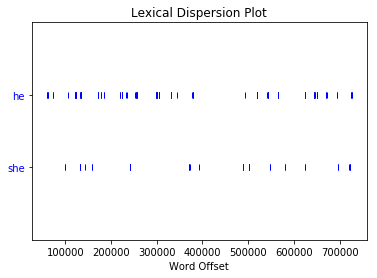

In [14]:
# Create a dispersion plot, showing where the list of words appear
# in the text.
text = get_text_tokens(1)
dp(text, ["he", "she"]) # uses the nltk dispersion plot library (dp).

# Bibliography

Bird, Steven, Edward Loper and Ewan Klein (2009), *Natural Language       Processing with Python*. O’Reilly Media Inc.

Archives Unleashed Project. (2018). Archives Unleashed Toolkit (Version 0.17.0). Apache License, Version 2.0.

In [21]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)